In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import seaborn as sns
from datetime import timedelta

In [36]:
# Zelle 2: Daten laden
# Lade die Ergebnisse des Genetic Matchings
df = pd.read_csv("../tests/matching_ergebnis.csv")
print(df.head())

                         teilaufgabe_id                teilaufgabe  \
0  2e2055a3-33f3-4451-b94e-8effc05c681e      Entwurf CAD-Baugruppe   
1  b217295a-9c66-4665-846c-ca6a6965ecb6    Simulation FEM-Struktur   
2  4debe244-8b4d-4e2b-a0e8-8d9958e4df1b  Signalverarbeitung Sensor   
3  b63b6603-d3d9-4fe5-8879-8ea6ed07ef09   Entwicklung Python-Modul   
4  7e685fac-bdf9-4944-94fa-7eff1ea78646    Statistische Auswertung   

                             projekt_id           kompetenz  \
0  cc1dfefd-b91a-4155-bb52-7f15f701af9f                 CAD   
1  cc1dfefd-b91a-4155-bb52-7f15f701af9f                 FEM   
2  cc1dfefd-b91a-4155-bb52-7f15f701af9f  Signalverarbeitung   
3  cc1dfefd-b91a-4155-bb52-7f15f701af9f              Python   
4  cc1dfefd-b91a-4155-bb52-7f15f701af9f          Stochastik   

                              person_id                      name  \
0  58cc6cce-d1ef-4930-bfe4-735f3e42b841                Flora Kaul   
1  4677c2ff-d15e-49de-a7f6-5b03f149d03a            Irmtraut Sa

In [37]:
# Zelle 3: Visualisierung vorbereiten
sns.set(style="whitegrid")

In [38]:
# Zelle 4: DataFrame für die tagesbasierte Darstellung
gantt_tage = []
for _, row in df.iterrows():
    tage = max(1, int(row['zugewiesener_aufwand'] / 8))
    aktuelles_datum = pd.Timestamp('2025-04-01')  # Beispielstartdatum
    for _ in range(tage):
        gantt_tage.append({
            'Datum': aktuelles_datum,
            'Aufgabe': row['teilaufgabe'],
            'Person': row['name'],
            'Aufgabe_Person': f"{row['teilaufgabe']} ({row['name']})"
        })
        aktuelles_datum += timedelta(days=1)
df_tagweise = pd.DataFrame(gantt_tage)

In [39]:
print(df_tagweise.head())
print(df_tagweise.columns)
print(len(df_tagweise))

       Datum                    Aufgabe                    Person  \
0 2025-04-01      Entwurf CAD-Baugruppe                Flora Kaul   
1 2025-04-01    Simulation FEM-Struktur            Irmtraut Sauer   
2 2025-04-01  Signalverarbeitung Sensor          Lili Trapp B.Sc.   
3 2025-04-01   Entwicklung Python-Modul  Frau Serpil Gunpf B.Eng.   
4 2025-04-01    Statistische Auswertung         Sebastian Carsten   

                                      Aufgabe_Person  
0                 Entwurf CAD-Baugruppe (Flora Kaul)  
1           Simulation FEM-Struktur (Irmtraut Sauer)  
2       Signalverarbeitung Sensor (Lili Trapp B.Sc.)  
3  Entwicklung Python-Modul (Frau Serpil Gunpf B....  
4        Statistische Auswertung (Sebastian Carsten)  
Index(['Datum', 'Aufgabe', 'Person', 'Aufgabe_Person'], dtype='object')
8


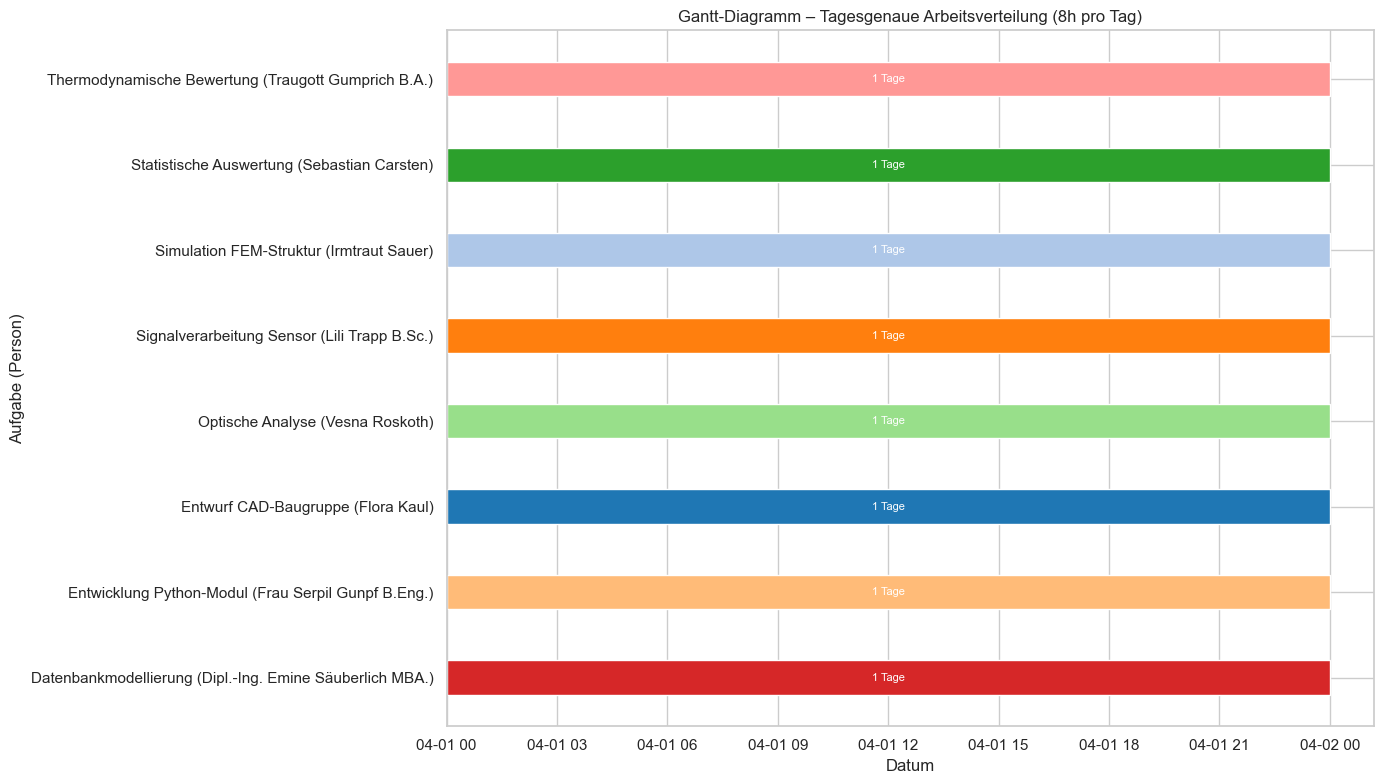

In [40]:
plt.figure(figsize=(14, 8))

# Assign a unique color to each task
tasks = df_tagweise['Aufgabe'].unique()
farben = sns.color_palette("tab20", len(tasks))
task_colors = dict(zip(tasks, farben))

sortierung = df_tagweise.groupby('Aufgabe_Person')['Datum'].min().sort_values().index

for i, aufgabe_person in enumerate(sortierung):
    gruppe = df_tagweise[df_tagweise['Aufgabe_Person'] == aufgabe_person]
    if not gruppe.empty:
        start = gruppe['Datum'].min()
        end = gruppe['Datum'].max() + timedelta(days=1)
        task = gruppe['Aufgabe'].iloc[0]
        plt.barh(
            y=aufgabe_person,
            left=start,
            width=(end - start).days,
            height=0.4,
            color=task_colors[task]
        )
        plt.text(
            start + (end - start) / 2,
            i,
            f"{(end - start).days} Tage",
            va='center',
            ha='center',
            fontsize=8,
            color='white'
        )

plt.xlabel('Datum')
plt.ylabel('Aufgabe (Person)')
plt.title('Gantt-Diagramm – Tagesgenaue Arbeitsverteilung (8h pro Tag)')
plt.tight_layout()
plt.show()

In [41]:
# Zelle 6: Interaktive Plotly-Visualisierung
pio.renderers.default = 'browser'
fig = px.timeline(
    df_tagweise,
    x_start='Datum',
    x_end=df_tagweise['Datum'] + pd.Timedelta(days=1),
    y='Aufgabe_Person',
    color='Person',
    hover_data=['Aufgabe', 'Person']
)
fig.update_yaxes(autorange='reversed')
fig.show()